In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class SimpleLinearRegression():
    
    def __init__(self):
        self.a = None
        self.b = None
    
    def fit(self, x_train, y_train):
        assert len(x_train) == len(y_train),\
            "The size of x_train and y_train should be equal"
            
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
            
        num = 0.0
        d = 0.0
        num = (x - x_mean).dot(y - y_mean)
        d = (x - x_mean).dot(x - x_mean)
        
#         for x, y in zip(x_train, y_train):
#             num += (x - x_mean) * (y- y_mean)
#             d += (x - x_mean)*

        self.a_ = num/d
        self.b_ = y_mean - self.a_ * x_mean
        return self
    
    def predict(self, x_predict):
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression"
        
    

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 5, 8, 9])

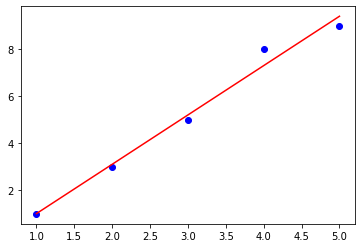

In [5]:
plt.scatter(x, y, color = 'blue')
reg1 = SimpleLinearRegression()
reg1.fit(x, y)
y_hat = reg1.predict(x)
plt.plot(x, y_hat, color = 'red')
plt.show()

In [8]:
from sklearn import datasets
boston = datasets.load_boston()
# print(boston)

In [10]:
x = boston.data[:, 5]
x.shape

(506,)

In [12]:
y = boston.target

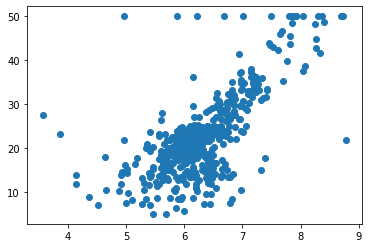

In [14]:
plt.scatter(x, y)
plt.show()

In [16]:
x = x[y < 50]
y = y[y < 50]

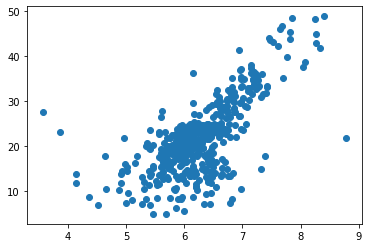

In [17]:
plt.scatter(x, y)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)    

In [21]:
x_train.shape

(367,)

In [23]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression

In [24]:
reg.a_

8.263960213540372

In [25]:
reg.b_

-30.1351776401618

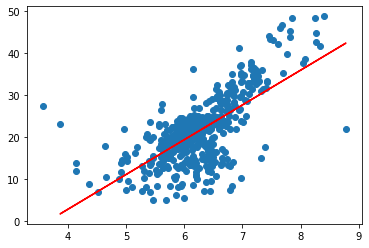

In [26]:
plt.scatter(x, y)
plt.plot(x_train, reg.predict(x_train), color = 'r')
plt.show()

In [28]:
y_predict = reg.predict(x_test)

# MSE

In [29]:
mse_test = np.sum((y_predict - y_test)**2/len(y_test))
mse_test

29.75593198147858

# RMSE

In [30]:
rmse_test = np.sqrt(mse_test)
rmse_test

5.4548998140642855

# MAE 

In [32]:
mae_test = np.sum(np.absolute(y_predict - y_test)/ len(y_test))
mae_test

3.969950589775187

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.4878071354470048